# SHAP Skeleton Code

In [1]:
!pip install shapley

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.6 MB/s eta 0:00:00:00:0100:01
  Created wheel for shapley: filename=shapley-1.0.3-py3-none-any.whl size=7558 sha256=74043ec8455b55fd03c673742189ec8c16e2afd307fdaba36149b6d1e1a7c027
  Stored in directory: /Users/wonny/Library/Caches/pip/wheels/42/28/25/b47609c3ce3bd5321d1e29cc13985f73655103360f93c4895c
Successfully built shapley
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.


In [3]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.5/436.5 kB 8.8 MB/s eta 0:00:00a 0:00:01


In [4]:
import pandas as pd
import numpy as np

# xgb 모델 사용
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split

import shap

X, y = shap.datasets.boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

model = XGBRegressor()
model.fit(X_train, y_train)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [5]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [6]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :])

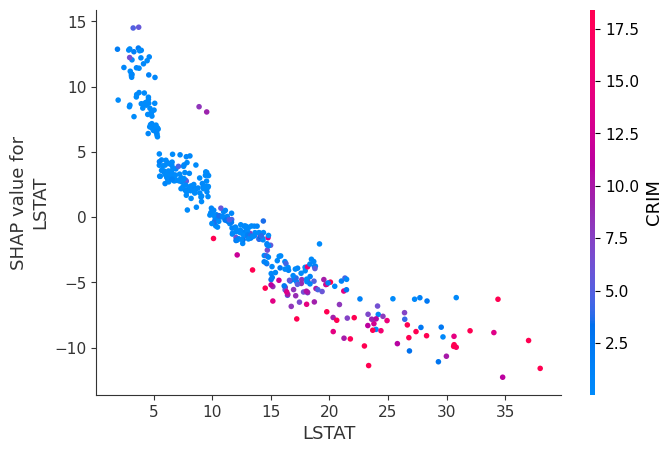

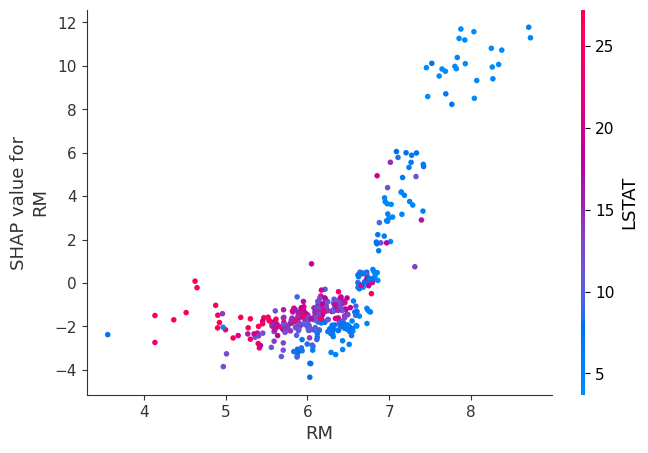

In [7]:
shap.initjs()
# 총 13개 특성의 Shapley value를 절댓값 변환 후 각 특성마다 더함 -> np.argsort()는 작은 순서대로 정렬, 큰 순서대로 정렬하려면
# 앞에 마이너스(-) 기호를 붙임
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# 영향력 top 2 컬럼
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, X_train)

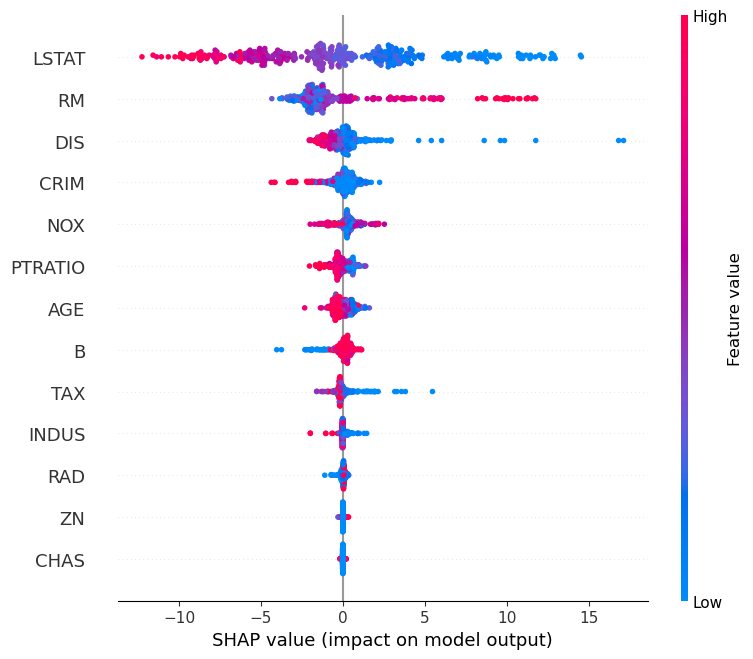

In [8]:
shap.summary_plot(shap_values, X_train)

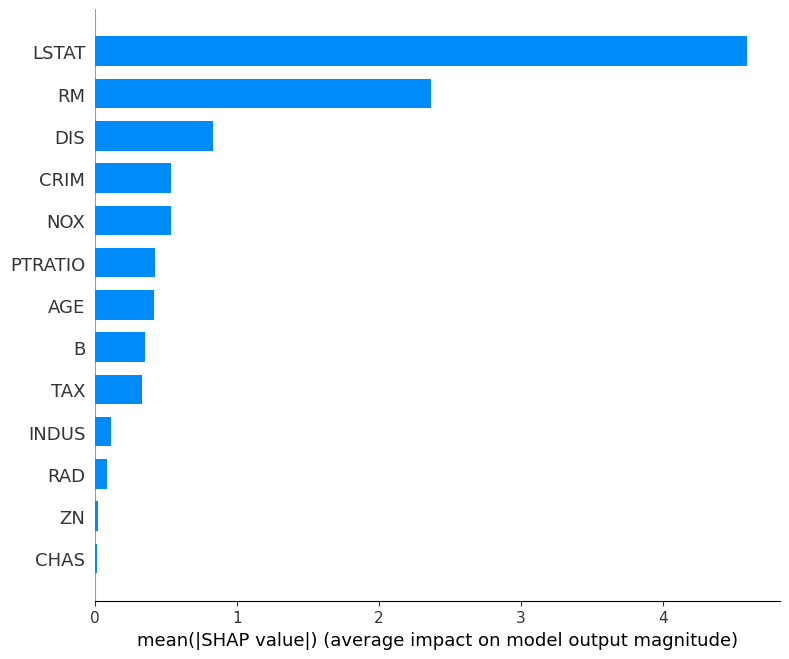

In [10]:
shap.summary_plot(shap_values, X_train, plot_type='bar')


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


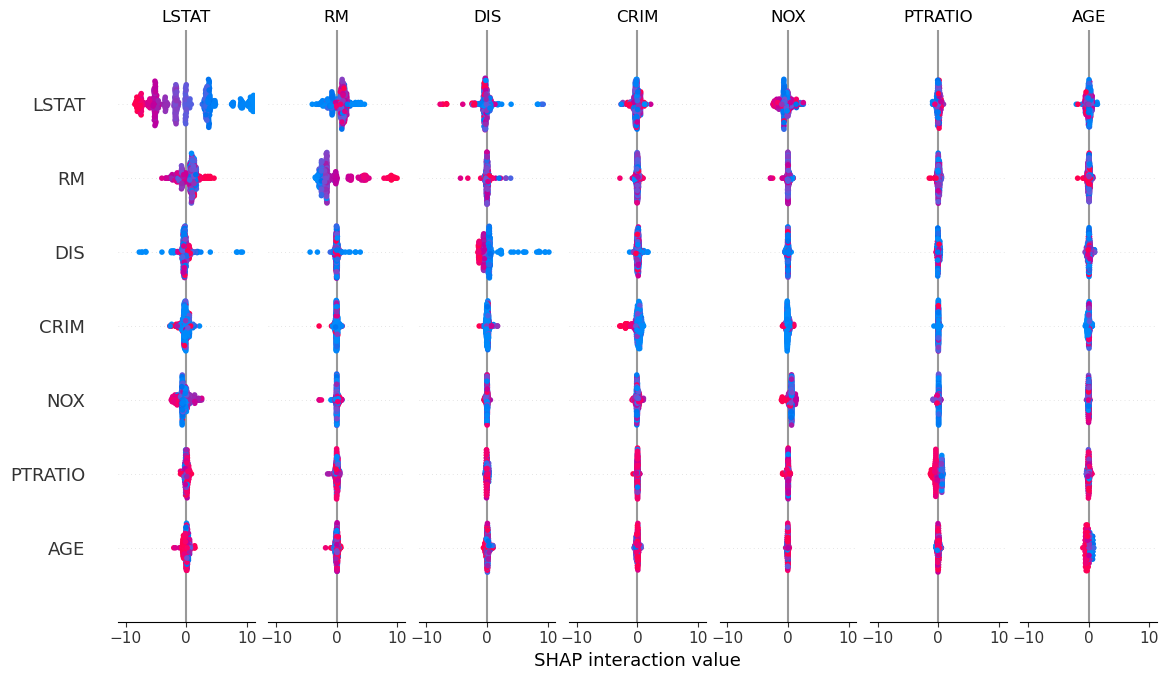

In [9]:
shap_interaction_values = explainer.shap_interaction_values(X_train)
shap.summary_plot(shap_interaction_values, X_train)

# shapley

model = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 0)
model.fit(X_train, y_train)

shap_imp = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_imp, X_train, plot_type = 'bar')

# LIME

In [11]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

model = RandomForestClassifier()
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print(score)

Populating the interactive namespace from numpy and matplotlib
0.9300699300699301


In [12]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=6f373b84aebaa396282598f06c0f05a2ef2eaba4d7bd6e273bd7445c5b171688
  Stored in directory: /Users/wonny/Library/Caches/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [13]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train, mode="classification", feature_names= cancer.feature_names)

idx = random.randint(1, len(X_test))

print("Prediction : ", model.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(X_test[idx], model.predict_proba, num_features=len(cancer.feature_names), labels=(0,) ,num_samples=5000)

Prediction :  [1]
Actual :      1


In [14]:
explanation.show_in_notebook()